# Customer churn classification

We have a dataset from a telecom company, which wants us to build a classification model that can take inputs of a customer and predict if he will churn or not.

Dataset:
- [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn)
- [Direct download](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

## Data preparation

- Download the data, read it with pandas
- Look at the data
- Make column names and values look uniform
- Check if all the columns read correctly
- Check if the churn variable needs any preparation

In [65]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
data_file_link = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data_file = '01_data_churn.csv'

### Download the data

In [3]:
# !wget $data_file_link -O $data_file

### Read the data file with `pandas`

In [4]:
df = pd.read_csv(data_file)

In [5]:
# Check rows, columns of the dataframe
df.shape

(7043, 21)

### Look at the data

In [6]:
# Check first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Make column names and values look uniform

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

We can observe that column names are not following common pattern in the naming.

We'll make the column names uniform. To make it uniform, we can convert the casing to 

In [8]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

#### Make values look uniform

In [9]:
cat_cols = list(df.dtypes[df.dtypes == 'object'].index)

for col in cat_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


### Check if all the columns read correctly

In [11]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Above, we can observe that `totalcharges` is of type `object`, though it should be of type `float64`.

In [12]:
df['totalcharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: object

In [13]:
# Try convert the column to numeric type
# Uncomment this to check error
# pd.to_numeric(df['totalcharges'])

It complains that some values contain "_". But we can tell pandas to consider errors as NaN.

In [14]:
tc = pd.to_numeric(df['totalcharges'], errors='coerce')

In [15]:
tc.isnull().sum()

11

In [16]:
df.loc[tc.isnull(), ['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [17]:
# Convert totalcharges column to numeric, keeping errors as NaN
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [18]:
# Fill NaN with 0 for now. Its not a nicest way, but for this we are doing so.
df['totalcharges'] = df['totalcharges'].fillna(0)

### Check if the churn variable needs any preparation

In [19]:
# First 5 rows for churn
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [20]:
# Convert object to bool
(df.churn == 'yes').head()

0    False
1    False
2     True
3    False
4     True
Name: churn, dtype: bool

In [21]:
# Convert churn column to int type
df.churn = (df.churn =='yes').astype(int)
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

## Setting up the validation framework

- Perform the train/val/test split with scikit-learn

__Split the dataset into Train(Full i.e. 80%) and Test(20%) parts__

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print(df_full_train.shape, df_test.shape)

(5634, 21) (1409, 21)


__Split the Train(Full) into Train and Validation parts__

Note: 20% of Train(Full) will not give us correct split i.e. 20% of total dataset. Instead, we need to do 25% of Train(Full) in order to get correct split.

In [23]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

print(df_train.shape, df_val.shape, df_test.shape)

(4225, 21) (1409, 21) (1409, 21)


In [24]:
# Reset the indices for all splits
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
# Take predictor column, churn out of the dataframes.
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [26]:
# Delete churn column from all splits
del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA

- Check missing values
- Look at the target variable
- Look at numerical and categorical variables

In [27]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,no,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.80,0
1,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,yes,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.45,0
2,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.45,1
3,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.95,1
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,yes,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,0.00,0


### Check missing values

In [28]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Hurray! No missing values :)

### Look at the target variable

In [29]:
# Counts of each category
df_full_train.churn.value_counts()

0    4138
1    1496
Name: churn, dtype: int64

In [30]:
# Percentage of each category
100*df_full_train.churn.value_counts(normalize=True)

0    73.446929
1    26.553071
Name: churn, dtype: float64

Global churn rate: 27%

### Look at numerical and categorical variables

In [31]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [32]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [33]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [35]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio (> 1 implies, more risk of churning)
- Mutual information

In [36]:
global_churn = df_full_train.churn.mean()
global_churn

0.2655307064252751

In [37]:
# group by gender
churn_male = df_full_train[df_full_train['gender'] == 'male'].churn.mean()
churn_female = df_full_train[df_full_train['gender'] == 'female'].churn.mean()

# Difference:
print('  Male churn diff', global_churn -  churn_male)
print('Female churn diff', global_churn -  churn_female)

# Risk ratio
print('  Male churn risk ratio', churn_male / global_churn)
print('Female churn risk ratio', churn_female / global_churn)

  Male churn diff 0.005052701575950558
Female churn diff -0.005310210939122428
  Male churn risk ratio 0.9809713097066141
Female churn risk ratio 1.0199984815715346


In [38]:
# group by partner
churn_partner = df_full_train[df_full_train['partner'] == 'yes'].churn.mean()
churn_partner_no = df_full_train[df_full_train['partner'] == 'no'].churn.mean()

# Difference:
print('   Partner churn diff', global_churn -  churn_partner)
print('No partner churn diff', global_churn -  churn_partner_no)

# Risk ratio
print('   Partner churn risk ratio', churn_partner / global_churn)
print('No partner churn risk ratio', churn_partner_no / global_churn)

   Partner churn diff 0.06479810569267436
No partner churn diff -0.06091557456646046
   Partner churn risk ratio 0.7559675618499149
No partner churn risk ratio 1.2294106598311754


We want to do the analysis for each variable in an easy manner.

```SQL
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender
```

In [39]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.270841
male      0.260478
Name: churn, dtype: float64

In [40]:
for col in categorical:
    print(col)
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793




partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968




dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


### Feature importance: Mutual Information

Mutual Information is the concept from Information Theory. It tells us how much we can learn about one variable if we know the value of another.

[Wiki](https://en.wikipedia.org/wiki/Mutual_information)

In [41]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [42]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.096652
onlinesecurity      0.063393
techsupport         0.060935
internetservice     0.053313
onlinebackup        0.045424
paymentmethod       0.042861
deviceprotection    0.042007
streamingtv         0.030844
streamingmovies     0.030705
paperlessbilling    0.019077
dependents          0.014129
partner             0.010227
seniorcitizen       0.010059
multiplelines       0.000654
gender              0.000069
phoneservice        0.000040
dtype: float64

### Feature importance: Correlation


[Wiki](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [43]:
df_full_train[numerical].head()

,tenure,monthlycharges,totalcharges
0,21,64.85,1336.80
1,54,97.20,5129.45
2,1,23.45,23.45
3,4,70.20,237.95
4,0,61.90,0.00


In [44]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

In [45]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5863636363636363

In [46]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.4064814814814815

In [47]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

0.17205957883923986

We can observe that the churn rate is decreasing as the tenure is increasing.

## One-Hot encoding

It is used to encode categorical variables into numerical type.

In [48]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [49]:
train_dicts[0]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 3,
 'monthlycharges': 19.85,
 'totalcharges': 64.55}

In [50]:
dv = DictVectorizer(sparse=False)

In [51]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [52]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [53]:
X_train = dv.transform(train_dicts)

In [54]:
X_val = dv.transform(val_dicts)

## Logistic Regression

In [55]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [56]:
z = np.linspace(-10, 10, 100)

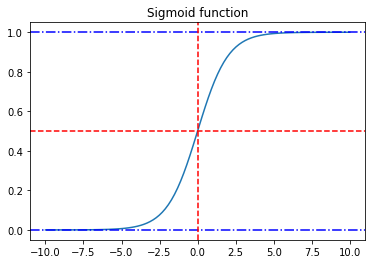

In [64]:
plt.plot(z, sigmoid(z))
# horizontal line at y=0.5
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
# horizontal line at y=1
plt.axhline(y = 1, color = 'b', linestyle = '-.')
# horizontal line at y=0
plt.axhline(y = 0, color = 'b', linestyle = '-.')
# vertical line at x=0
plt.axvline(x = 0, color = 'r', linestyle='--')
plt.title('Sigmoid function')
plt.show()

In [66]:
# Model 
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/base-ds-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
# Intercept or initial value
model.intercept_[0]

-0.13066234829841245

In [73]:
# Coefficients or weights for each feature
model.coef_[0].round(3)

array([ 0.549, -0.21 , -0.469, -0.049, -0.08 ,  0.036, -0.115, -0.05 ,
        0.029, -0.158, -0.311,  0.297, -0.115,  0.002, -0.219,  0.122,
       -0.032,  0.089, -0.115, -0.103,  0.243, -0.115, -0.257, -0.242,
        0.113, -0.103, -0.026, -0.114, -0.183,  0.261, -0.094,  0.122,
       -0.251,  0.179, -0.153, -0.115,  0.139, -0.068, -0.115,  0.054,
        0.207, -0.115, -0.221, -0.059,  0.   ])

In [68]:
y_train_preds = model.predict(X_train)

In [69]:
y_train_probs = model.predict_proba(X_train)
y_train_probs[:10]

array([[0.83461575, 0.16538425],
       [0.87410924, 0.12589076],
       [0.80958214, 0.19041786],
       [0.81958368, 0.18041632],
       [0.97066974, 0.02933026],
       [0.99058599, 0.00941401],
       [0.85972765, 0.14027235],
       [0.70528029, 0.29471971],
       [0.9862609 , 0.0137391 ],
       [0.46938499, 0.53061501]])

In [74]:
y_val_probs = model.predict_proba(X_val)

In [75]:
for a,p in zip(y_val[:10], y_val_probs[:, 1][:10]):
    print(a, p)

0 0.14936159160150678
0 0.2439763411894133
1 0.40573734098631115
1 0.5615601288851773
0 0.04874861565190464
0 0.10292239356546513
0 0.3756443200857885
0 0.013643141709531773
0 0.052034258004068704
0 0.1464027117876689


In [76]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_val_probs[:, 1]
df_pred['prediction'] = (df_pred['probability'] > 0.5).astype(int)
df_pred['actual'] = y_val

df_pred.head()

,probability,prediction,actual
0,0.149362,0,0
1,0.243976,0,0
2,0.405737,0,1
3,0.561560,1,1
4,0.048749,0,0


In [77]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [78]:
df_pred['correct'].mean()

0.8026969481902059

## Using the model

In [79]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'dsl',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'no',
 'paymentmethod': 'mailed_check',
 'tenure': 21,
 'monthlycharges': 64.85,
 'totalcharges': 1336.8}

In [80]:
dv = DictVectorizer(sparse=False)

X_full_train = dv.fit_transform(dicts_full_train)

In [82]:
y_full_train = df_full_train.churn.values

In [84]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/opt/homebrew/Caskroom/miniforge/base/envs/base-ds-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
dicts_full_test = df_test[categorical + numerical].to_dict(orient='records')
dicts_full_test[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 24.8,
 'totalcharges': 24.8}

In [86]:
X_test = dv.transform(dicts_full_test)

In [88]:
y_test_probs = model.predict_proba(X_test)[:, 1]

In [89]:
churn_decision = (y_test_probs >= 0.5)

In [90]:
(churn_decision == y_test).mean()

0.8218594748048261

In [108]:
# random customer from test
cust_idx = np.random.randint(len(y_test))
print('Customer index:',cust_idx)

customer = dicts_full_test[cust_idx]
X_small = dv.transform([customer])
print('Prob of churn:', model.predict_proba(X_small)[0, 1])
print('actual churn:', y_test[cust_idx])

Customer index: 645
Prob of churn: 0.35416458713745236
actual churn: 1
